# Programming for Data Analysis Project 2019


### Arnoud van Balkom

## Life expectancy of males living in Ireland

![](http://www.northernhillscofc.org/wp-content/uploads/2018/12/life-expectancy-decline.jpg)

In [1]:
# Import the required libraries and use the standard abbreviations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Set my preferred style for seaborn plots
sns.set_style("darkgrid")

## Introduction

When I say "life expectancy", what I am talking about is the mean age at death. It's something that affects all of us, and I am very curious to find out which of my chosen variables affect it the most. I have chose 4 other variables, of which I expect at least 3 to strongly influence life expectancy. Also I would like to find out how all variables correlate with each other. I will then use python code to simulate a correlated dataset.

### Variables used
- Life expectancy
- Birth weight
- Birth place by province
- IQ
- Height

## Part 1: Variables explained and first attempt at a dataset

### 1.1 Life expectancy of males in Ireland

After investigation I found that the mean life expectancy of males living in Ireland is 80.4 years. # http://publicpolicy.ie/downloads/papers/2019/Irish_Population_Health_Life_Expectancy_and_Mortality.pdf
I also found that it is not a perfect normal distribution. For instance, age can not be negative, and a normal distribution assumes negative possibilities. Also it seems impossible for males to reach 120 years of age due to genetic restrictions, yet the normal distribution assumes possible values till infinity. But despite these facts, the normal distribution describes the data I found well enough to use it.
It turns out the standard deviation is around 12. The standard deviation is a very useful number, which tells us how far from the mean 68 percent of the data is located. 95 percent of the data is located within 2 standard deviations.

In [46]:
# Set the values for the mean and the standard deviation and use them to generate 1000 values, using the normal distribution.
meanle = 80.4
stdle = 12
le = np.random.normal(80.4, 12, 1000)

In [47]:
# Display the 1000 values that were created. I'll only be doing this the first time to check if the code worked.
le

array([ 53.1627427 ,  77.82389421,  80.5890232 ,  66.40989935,
        81.6772493 ,  76.62901807,  95.57569707,  73.26377092,
        89.05053211,  80.63190389,  74.00673593,  92.16107915,
        76.0759478 ,  73.77256271,  86.67309053,  86.56407418,
        82.07360713,  72.48324928,  63.81039068, 107.21704659,
        53.9670387 ,  95.22762605,  79.41534873,  64.77029181,
        66.88940841,  84.70485701,  84.95644953,  83.94871746,
        61.45631204, 103.79552972,  83.29596722,  97.40380635,
        92.36662325,  89.9438625 ,  83.2905034 ,  84.88394942,
        98.64782577,  68.16539541,  92.5730969 ,  88.1896676 ,
        86.48556314,  85.02040052,  83.75829056,  83.62648261,
        75.98280723,  79.51936163,  80.43396155,  70.76747055,
        87.44575635,  74.87567457,  92.39263302,  87.17864718,
        56.39028197,  71.42173185,  59.6937566 ,  69.0415326 ,
        70.46469839,  83.81318136,  85.58364466,  80.59076191,
        72.75302206,  60.86164107,  91.06752378,  85.68

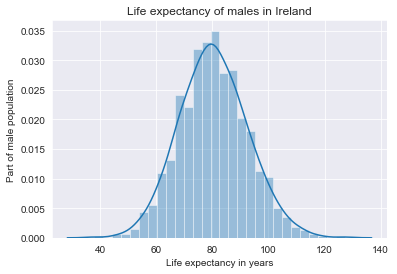

In [48]:
# Plot a distplot to take a quick look at the distribution
sns.distplot(le)
plt.xlabel("Life expectancy in years")
plt.ylabel("Part of male population")
plt.title("Life expectancy of males in Ireland");

Let's have a look at the mean and the medain

In [49]:
np.mean(le)

80.40920176963796

In [50]:
np.median(le)

80.1052727899721

The mean and the median are very close in value, which is a sign of a normally distributed variable. Also the bell curve in above plot suggests a normal distribution.

Now that I know which distribution to use, I can start creating the first column of my synthesized dataset.

In [87]:
# Creata a pandas dataframe called df and add a column "Life expectancy in years"
df = pd.DataFrame(le, columns = ["Life expectancy in years"])

In [88]:
# Display the life expectancy as an integer
# I found out how to do this here: https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
df["Life expectancy in years"] = pd.DataFrame(le, columns = ["Life expectancy in years"])
df["Life expectancy in years"] = df["Life expectancy in years"].astype(int) 
df

Life expectancy in years
0                          53
1                          77
2                          80
3                          66
4                          81
5                          76
6                          95
7                          73
8                          89
9                          80
10                         74
11                         92
12                         76
13                         73
14                         86
15                         86
16                         82
17                         72
18                         63
19                        107
20                         53
21                         95
22                         79
23                         64
24                         66
25                         84
26                         84
27                         83
28                         61
29                        103
..                        ...
970                        91
971                        70
972                        88
973                        67
974                        60
975                        92
976                        76
977                        85
978                        58
979                        66
980                        85
981                        77
982                        88
983                        99
984                        69
985                       111
986                        86
987                        92
988                        66
989                        81
990                        78
991                        88
992                        81
993                        81
994                        80
995                        79
996                        86
997                        87
998                        77
999                        87

[1000 rows x 1 columns]

### 1.2 Birth weight

The mean birthweight for male babies in Ireland is 3541 grams. https://www.publichealth.ie/files/file/Unequal_at_Birth.pdf
Birth weight can be described by the normal distribution. Although, like with life expectancy, it is not perfect, it is close enough.
I could not find exact data for Ireland as regards to the standard deviation, but I found it to be 570 grams in the United States, and am going to assume it won't differ too much from the situation in Ireland. https://appohigh.enschool.org/ourpages/auto/2012/8/29/41712937/Standard%20Normal%20Distributions%209-24-12.pdf


In [53]:
# Set values for mean and standarddeviation
meanbw = 3541
stdbw = 570
# Generate 1000 values using the normal distribution
bw = np.random.normal(3541, 570, 1000)

In [54]:
sns.distplot(bw) # distplot is used to take a quick look at the distribution
plt.xlabel("Birth weight in grams")
plt.ylabel("Part of male population")
plt.title("Birth weight Irish males in grams");

In [89]:
# Display the birth weight as an integer and add to dataframe
df["Birth Weight in grams"] = pd.DataFrame(bw, columns = ["Birth Weight in grams"])
df["Birth Weight in grams"] = df["Birth Weight in grams"].astype(int)
df

Life expectancy in years  Birth Weight in grams
0                          53                   3946
1                          77                   4139
2                          80                   2943
3                          66                   4279
4                          81                   3943
5                          76                   4229
6                          95                   2556
7                          73                   3642
8                          89                   2674
9                          80                   3703
10                         74                   3290
11                         92                   3882
12                         76                   4321
13                         73                   3239
14                         86                   3946
15                         86                   2971
16                         82                   2989
17                         72                   2328
18                         63                   3685
19                        107                   3174
20                         53                   4159
21                         95                   3934
22                         79                   3651
23                         64                   4355
24                         66                   4600
25                         84                   2768
26                         84                   3301
27                         83                   3596
28                         61                   3942
29                        103                   3246
..                        ...                    ...
970                        91                   3810
971                        70                   4125
972                        88                   1765
973                        67                   4918
974                        60                   3584
975                        92                   3172
976                        76                   3571
977                        85                   4056
978                        58                   3571
979                        66                   2927
980                        85                   3198
981                        77                   4889
982                        88                   4092
983                        99                   3145
984                        69                   4087
985                       111                   2335
986                        86                   3096
987                        92                   3008
988                        66                   3779
989                        81                   3985
990                        78                   2805
991                        88                   3963
992                        81                   3738
993                        81                   3770
994                        80                   3439
995                        79                   3132
996                        86                   3334
997                        87                   2435
998                        77                   3837
999                        87                   2652

[1000 rows x 2 columns]

In [56]:
# Show mean and median
np.mean(bw)

3531.1466974401865

In [57]:
np.median(bw)

3543.668736294694

The mean and median are again very close in value, suggesting a normal distribution.

### 1.3 Province of birth

In [58]:
# Set the probabilities for someone to be born in each of the provinces. Figures derived from official data. 
# For ulster, the Northern-Irish counties have not been included.
ulster = 0.06
munster = 0.28
leinster = 0.54
connacht = 0.12

With numpy.random.choice we can now generate values for the different provinces, using the values set in the cell above.

In [59]:
# Create 1000 values for the column "Province"
prov = ["Ulster", "Munster", "Leinster", "Connacht"]
rprov = np.random.choice(prov, 1000, p=[ulster, munster, leinster, connacht])

In [60]:
# Add the column "Province" to the dataframe
df["Province"] = pd.DataFrame(rprov, columns = ["Province"])

In [61]:
df

Life expectancy in years  Birth Weight in grams  Province
0                          53                   3946  Leinster
1                          77                   4139   Munster
2                          80                   2943  Leinster
3                          66                   4279   Munster
4                          81                   3943  Leinster
5                          76                   4229  Leinster
6                          95                   2556  Leinster
7                          73                   3642  Leinster
8                          89                   2674  Leinster
9                          80                   3703   Munster
10                         74                   3290   Munster
11                         92                   3882  Connacht
12                         76                   4321  Leinster
13                         73                   3239    Ulster
14                         86                   3946  Leinster
15                         86                   2971   Munster
16                         82                   2989  Leinster
17                         72                   2328  Leinster
18                         63                   3685  Leinster
19                        107                   3174   Munster
20                         53                   4159  Leinster
21                         95                   3934    Ulster
22                         79                   3651   Munster
23                         64                   4355  Leinster
24                         66                   4600  Leinster
25                         84                   2768  Leinster
26                         84                   3301   Munster
27                         83                   3596   Munster
28                         61                   3942  Leinster
29                        103                   3246  Leinster
..                        ...                    ...       ...
970                        91                   3810  Connacht
971                        70                   4125  Leinster
972                        88                   1765  Leinster
973                        67                   4918   Munster
974                        60                   3584  Leinster
975                        92                   3172  Connacht
976                        76                   3571    Ulster
977                        85                   4056  Leinster
978                        58                   3571  Leinster
979                        66                   2927    Ulster
980                        85                   3198  Connacht
981                        77                   4889  Leinster
982                        88                   4092  Leinster
983                        99                   3145  Leinster
984                        69                   4087   Munster
985                       111                   2335  Leinster
986                        86                   3096  Leinster
987                        92                   3008  Leinster
988                        66                   3779   Munster
989                        81                   3985   Munster
990                        78                   2805    Ulster
991                        88                   3963  Leinster
992                        81                   3738  Connacht
993                        81                   3770   Munster
994                        80                   3439  Leinster
995                        79                   3132  Connacht
996                        86                   3334  Leinster
997                        87                   2435   Munster
998                        77                   3837  Leinster
999                        87                   2652  Leinster

[1000 rows x 3 columns]

In [62]:
# Count how often each province is represented
Ulster = df.Province[df.Province == "Ulster"].count()
Leinster = df.Province[df.Province == "Leinster"].count()
Munster = df.Province[df.Province == "Munster"].count()
Connacht = df.Province[df.Province == "Connacht"].count()

In [63]:
# Plot a pie plot with the percentage per province
# Set labels for the pie plot
a = ([Ulster, Leinster, Munster, Connacht])
labels = "Ulster", "Leinster", "Munster", "Connacht" 
# Plot a pie plot, round the percentages at 1 decimal to make it more readable.
plt.pie(a,labels = labels, autopct ="%1.1f%%");
#learned about pie plot here: https://pythonspot.com/matplotlib-pie-chart/

### 1.4 IQ

IQ is a numerical value, with integers ranging from 0 to infinity (but very few score higher than 140). 
After investigation, I found that the average IQ in Ireland is 92. http://worldpopulationreview.com/countries/average-iq-by-country/
There is a lot of debate about which of the sexes has the highest IQ, but most research shows little to no difference. Therefore I am going to take 92 as the mean IQ of males in Ireland.
IQ is normally distributed (although not completely, as there is no negative IQ, but it is otherwise very close to being normally distributed). And I found that the standard deviation in developed countries is close to 12 https://infoproc.blogspot.com/2010/11/standard-deviations-around-world.html

In [64]:
avgiq = 92
std = 12

iq = np.random.normal(avgiq,std, 1000 )

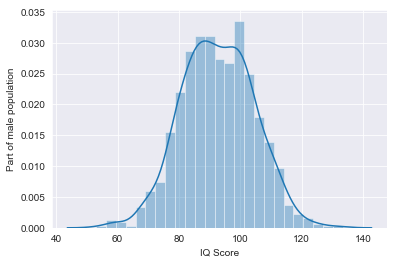

In [65]:
sns.distplot(iq)
plt.xlabel("IQ Score")
plt.ylabel("Part of male population");

As you can see in above plot, the values around the mean of 92 are highest represented, and the <em> bell curve </em> that the normal distribution gives, shows us the further away from 92, the more unlikely the scores are.

In [90]:
# Add a column "IQ" to the dataframe as an integer
df["IQ"] = pd.DataFrame(iq, columns = ["IQ"])
df["IQ"] = df["IQ"].astype(int)
df

Life expectancy in years  Birth Weight in grams   IQ
0                          53                   3946  102
1                          77                   4139  100
2                          80                   2943   95
3                          66                   4279   97
4                          81                   3943   84
5                          76                   4229   75
6                          95                   2556  111
7                          73                   3642  107
8                          89                   2674   86
9                          80                   3703   87
10                         74                   3290  101
11                         92                   3882   87
12                         76                   4321   78
13                         73                   3239   74
14                         86                   3946   75
15                         86                   2971  110
16                         82                   2989   88
17                         72                   2328   91
18                         63                   3685   79
19                        107                   3174   90
20                         53                   4159   89
21                         95                   3934   91
22                         79                   3651   95
23                         64                   4355   93
24                         66                   4600   79
25                         84                   2768   76
26                         84                   3301   68
27                         83                   3596   97
28                         61                   3942   87
29                        103                   3246  102
..                        ...                    ...  ...
970                        91                   3810  107
971                        70                   4125  100
972                        88                   1765  102
973                        67                   4918   87
974                        60                   3584  104
975                        92                   3172  113
976                        76                   3571   77
977                        85                   4056   85
978                        58                   3571   84
979                        66                   2927   82
980                        85                   3198   90
981                        77                   4889   90
982                        88                   4092   82
983                        99                   3145  105
984                        69                   4087   89
985                       111                   2335  104
986                        86                   3096   94
987                        92                   3008   80
988                        66                   3779   96
989                        81                   3985   93
990                        78                   2805   87
991                        88                   3963   69
992                        81                   3738   78
993                        81                   3770  110
994                        80                   3439   82
995                        79                   3132  102
996                        86                   3334   75
997                        87                   2435  104
998                        77                   3837  104
999                        87                   2652   87

[1000 rows x 3 columns]

### 1.5 Height

The average height of adult males in Ireland is 178.9 cm. https://www.thejournal.ie/height-irish-2899850-Jul2016/
Height is very close to being normally distributed. The standard deviation is around 7.6. https://ourworldindata.org/uploads/2019/06/distribution-1.png

In [67]:
# Set mean and standarddeviation values
meanh = 178.9
stdh = 7.6
# Create 1000 values for "height"
height = np.random.normal(meanh, stdh, 1000)

In [68]:
sns.distplot(height)
plt.xlabel("Height in cm")
plt.ylabel("Part of male population")
plt.title("Height of adult Irish males in cm");

In [91]:
# Add a new column "Height" to the dataframe as an integer
df["Height in cm"] = pd.DataFrame(height, columns = ["Height in cm"])
df["Height in cm"] = df["Height in cm"].astype(int)
df

Life expectancy in years  Birth Weight in grams   IQ  Height in cm
0                          53                   3946  102           177
1                          77                   4139  100           185
2                          80                   2943   95           182
3                          66                   4279   97           176
4                          81                   3943   84           188
5                          76                   4229   75           175
6                          95                   2556  111           160
7                          73                   3642  107           183
8                          89                   2674   86           175
9                          80                   3703   87           176
10                         74                   3290  101           163
11                         92                   3882   87           178
12                         76                   4321   78           185
13                         73                   3239   74           178
14                         86                   3946   75           181
15                         86                   2971  110           194
16                         82                   2989   88           174
17                         72                   2328   91           172
18                         63                   3685   79           178
19                        107                   3174   90           177
20                         53                   4159   89           187
21                         95                   3934   91           173
22                         79                   3651   95           174
23                         64                   4355   93           177
24                         66                   4600   79           190
25                         84                   2768   76           167
26                         84                   3301   68           188
27                         83                   3596   97           173
28                         61                   3942   87           173
29                        103                   3246  102           179
..                        ...                    ...  ...           ...
970                        91                   3810  107           176
971                        70                   4125  100           170
972                        88                   1765  102           189
973                        67                   4918   87           194
974                        60                   3584  104           187
975                        92                   3172  113           189
976                        76                   3571   77           174
977                        85                   4056   85           171
978                        58                   3571   84           173
979                        66                   2927   82           188
980                        85                   3198   90           167
981                        77                   4889   90           173
982                        88                   4092   82           171
983                        99                   3145  105           173
984                        69                   4087   89           164
985                       111                   2335  104           191
986                        86                   3096   94           175
987                        92                   3008   80           184
988                        66                   3779   96           176
989                        81                   3985   93           173
990                        78                   2805   87           166
991                        88                   3963   69           176
992                        81                   3738   78           177
993                        81                

## Part 2: Relationships between variables

We now have a dataset with 1000 data points. The data is realistically distributed for every variable separataly. However, we have not yet considered any potential correlations between variables. I want to know the degree to which the variables are correlated, so I am going to try and find out the measure of interdepence (correlation) between the different variables. Once you have done your research and have an idea of the correlations, Numpy offers a way of using this data to adjust the dataset accordingly. It does so using the <em> multivariate </em> function, which can be used on normal distributions. It gives you the opportunity to model linear correlations between random, normally distributed, variables. However, this function works with the covariance, and I am looking for the correlation. This means I also have to take the standard deviation into account. The correlation is the covariance, normalized by the product of standard deviations, which gives us a value <em>r</em>, between -1 and 1. # https://realpython.com/python-random/

### 2.1 Relationships between variables

After doing my research I found out the province of birth has little to no effect on the life expectancy or any of the other variables. Therefore I will regard this variable as random, not correlated with the rest, and will ignore it for the rest of this project. 
 
The other 4 variables are all related in some way or another, and through thorough research I have come up with estimated values for their covariances.

It turns out, the higher your iq, the higher your life expectancy. On the other hand, height had a clear negative correlation with life expectancy, as did birth weight (albeit to a lesser degree). A low birth weight is related to a lower iq, and the same is true for smaller people, who tend to have a lower iq. And finally there is a strong positive relationship between birth weight and height. I have estimated the correlations with the help of several scientific articles I found.
https://www.statnews.com/2017/06/28/high-iq-children-longevity-study/
https://medicalxpress.com/news/2014-03-genetic-link-height-iq.html
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1071721/
https://www.reuters.com/article/us-health-iq-birth-weight-idUSKCN18E29J
https://www.ncbi.nlm.nih.gov/pubmed/10206622

### 2.2 Calculate the exact correlations between variables and simulate correlated dataset

In [70]:
# Create a function "covstd" that can be called later. This function creates a covariance matrix from the correlations and standarddeviations.
def covstd(corrmatrix, stds) -> np.ndarray:
    cvmatrix = np.diag(stds)
    return cvmatrix @ corrmatrix @ cvmatrix # Multiply the matrices
# I spent hours trying to figure out how to do this, and finally found some inspiration here: https://realpython.com/python-random/

In [71]:
# Set the covariance values between the variables. The diagonal from top left to bottom right is always 1, as it is the covariance with the variable itself.
corr = np.array([[1.0,0.18,0.4,-0.3],
                [0.18,1.0,0.3,0.65],
                [0.4,0.3,1.0,0.25], 
                [-0.3,0.65,0.25,1.0]])
# https://realpython.com/python-random/

In [72]:
corr

array([[ 1.  ,  0.18,  0.4 , -0.3 ],
       [ 0.18,  1.  ,  0.3 ,  0.65],
       [ 0.4 ,  0.3 ,  1.  ,  0.25],
       [-0.3 ,  0.65,  0.25,  1.  ]])

In [73]:
# Set the standard deviation, mean and covariance values for all 4 variables
std = np.array([12, 570, 12, 7.6])
mean = np.array ([80.4, 3541, 92, 178.9])
cov = covstd(corr, std)

In [92]:
# Use Numpy's multivariate function to generate 1000 correlated values for each variable
lexp = np.random.multivariate_normal(mean = mean, cov = cov, size = 1000)
# Display as integers
lexp.astype(int)
# https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.random.multivariate_normal.html

array([[  85, 3976,  104,  182],
       [  54, 2786,   72,  174],
       [  79, 3607,   90,  189],
       ...,
       [  79, 3795,   90,  190],
       [  75, 3536,  118,  183],
       [  57, 3528,   69,  183]])

In [75]:
# Create new dataframe "dfcor" with the 4 correlated variables
dfcor = pd.DataFrame(lexp, columns = {"Life expectancy in years":np.random.normal(80.4, 12), "Birth weight in grams":np.random.normal(3541, 570), 
                                     "IQ":np.random.normal(92,12), "Height in cm":np.random.normal(178.9, 7.6)})

In [93]:
# Display dfcor and turn the floats into integers
dfcor = dfcor.astype(int)
dfcor

Life expectancy in years  Birth weight in grams   IQ  Height in cm
0                          72                   2475   82           164
1                          64                   3646  108           175
2                          88                   3606  103           176
3                          86                   2954   91           171
4                          90                   2632   84           165
5                          76                   2612   96           173
6                          73                   3217   86           179
7                          70                   4105   99           189
8                          71                   2369   80           160
9                          87                   2756   98           169
10                         47                   3043   70           191
11                         82                   4962   96           186
12                         71                   2556   65           167
13                         87                   3317   91           173
14                         80                   3338   99           180
15                         78                   3927   85           177
16                         74                   4000   74           179
17                         89                   4193   94           184
18                         88                   3895  108           177
19                         77                   3709   86           181
20                         77                   3325   81           183
21                         86                   2571   92           175
22                         75                   3606   89           179
23                         79                   4854   95           191
24                         78                   3132   81           165
25                         70                   4317   98           184
26                         57                   2784   78           180
27                         77                   4462   87           182
28                         99                   3318  105           179
29                         91                   3719   94           180
..                        ...                    ...  ...           ...
970                        67                   3225   93           182
971                        89                   2779   88           164
972                        59                   2918   70           186
973                        98                   3813   92           171
974                        77                   2810   64           166
975                        77                   3365   85           177
976                        90                   3519   88           173
977                        81                   4103  101           182
978                        69                   2862   97           173
979                        90                   4081   94           183
980                        78                   4040   83           178
981                        90                   3607  110           180
982                        74                   3026   87           175
983                       100                   4176  108           181
984                        73                   3022  111           173
985                        70                   3086   87           179
986                        88                   3518  105           187
987                        94                   3399   89           175
988                        88                   2616   87           177
989                        60                   3210   91           181
990                        92                   3537   86           180
991                        93                   3173  104           170
992                        82                   4247   99           182
993                        67                

## Part 3: Visualizations and data check

### 3.1 Double check our correlations

Let's see if the correlations worked correctly and check the values of the other variables for every person below 1.75, compared to everyone who is 1.75 or taller.

In [110]:
# Create 2 new categories, "smallpeople", and "tallpeople".
smallpeople = dfcor[dfcor["Height in cm"].between(0,174)]
tallpeople = dfcor[dfcor["Height in cm"] > 174]

In [95]:
# Show the rows with data from all persons smaller than 175 cm.
smallpeople

Life expectancy in years  Birth weight in grams   IQ  Height in cm
0                          72                   2475   82           164
3                          86                   2954   91           171
4                          90                   2632   84           165
5                          76                   2612   96           173
8                          71                   2369   80           160
9                          87                   2756   98           169
12                         71                   2556   65           167
13                         87                   3317   91           173
24                         78                   3132   81           165
31                         67                   2870   65           174
38                         85                   2896   80           164
39                         92                   3445  111           174
41                         88                   3664   96           174
47                         84                   3339  107           164
52                         77                   2028   98           160
54                         72                   2892   82           168
58                         99                   3635   75           169
60                         70                   3079   87           172
63                         95                   2343   92           161
67                         66                   2902   88           168
73                         80                   3240   95           173
75                         75                   2262   77           173
78                         92                   3491   92           160
79                         97                   3211  100           172
93                         81                   2734   77           171
99                        108                   3612   90           169
100                        81                   3427   63           170
101                        85                   3780  105           167
102                        79                   2472   80           165
103                        78                   2624   75           167
..                        ...                    ...  ...           ...
910                       100                   3212   99           171
914                        65                   2876   99           173
918                        72                   2770   81           170
920                        83                   3383   83           172
922                        92                   3246   99           174
924                        87                   3510   80           168
926                        89                   2521   74           164
930                        87                   3282   79           167
935                       107                   3498   89           167
945                        97                   3223  102           166
947                        98                   3090   81           170
950                        96                   3235  110           172
951                        68                   2733   84           167
952                        73                   2721   93           165
953                        83                   2923   75           163
954                        84                   2959   91           172
955                        90                   3735   85           170
957                        79                   3070   77           168
959                        57                   2990   83           174
960                        92                   3689  104           170
964                        89                   3504   71           170
966                        84                   2590   98           172
968                        89                   3074   89           174
971                        89                

In [98]:
# Check the maximum values to get an idea of what values to use for "tallpeople". However these values are subject to change
# when the dataframe is generated again, so I choose to use 1000 as a safe maximumvalue for height in cm.
dfcor.max()

Life expectancy in years     112
Birth weight in grams       6015
IQ                           130
Height in cm                 201
dtype: int32

In [109]:
# Show the rows with data from all persons taller than 174 cm.
tallpeople

Life expectancy in years  Birth weight in grams   IQ  Height in cm
1                          64                   3646  108           175
2                          88                   3606  103           176
6                          73                   3217   86           179
7                          70                   4105   99           189
10                         47                   3043   70           191
11                         82                   4962   96           186
14                         80                   3338   99           180
15                         78                   3927   85           177
16                         74                   4000   74           179
17                         89                   4193   94           184
18                         88                   3895  108           177
19                         77                   3709   86           181
20                         77                   3325   81           183
21                         86                   2571   92           175
22                         75                   3606   89           179
23                         79                   4854   95           191
25                         70                   4317   98           184
26                         57                   2784   78           180
27                         77                   4462   87           182
28                         99                   3318  105           179
29                         91                   3719   94           180
30                         65                   3853   86           189
31                         67                   2870   65           174
32                         78                   3540   67           178
33                         68                   3546   73           178
34                         76                   3272  104           176
35                         64                   2782   95           179
36                         74                   3141  108           179
37                         91                   4503  106           185
39                         92                   3445  111           174
..                        ...                    ...  ...           ...
961                        90                   3943  109           190
962                        79                   3925   93           180
963                        73                   3341  101           179
965                        71                   3532  103           186
967                        69                   3387   88           178
968                        89                   3074   89           174
969                        86                   3816   93           185
970                        67                   3225   93           182
972                        59                   2918   70           186
975                        77                   3365   85           177
977                        81                   4103  101           182
979                        90                   4081   94           183
980                        78                   4040   83           178
981                        90                   3607  110           180
982                        74                   3026   87           175
983                       100                   4176  108           181
985                        70                   3086   87           179
986                        88                   3518  105           187
987                        94                   3399   89           175
988                        88                   2616   87           177
989                        60                   3210   91           181
990                        92                   3537   86           180
992                        82                   4247   99           182
993                        67                

In [81]:
smallpeople.mean()

Life expectancy in years      83.970395
Birth weight in grams       3109.226974
IQ                            88.128289
Height in cm                 169.832237
dtype: float64

In [82]:
tallpeople.mean()

Life expectancy in years      78.496644
Birth weight in grams       3679.417450
IQ                            92.851007
Height in cm                 181.726174
dtype: float64

When looking at the mean values, it is clear that tall people have a much lower life expectancy, a much higher weight at birth, and a higher IQ. It seems our simulated dataset now shows proper correlations.

### 3.4 Visualiziations

To further visualize the correlations I am going to plot a few interesting ones.

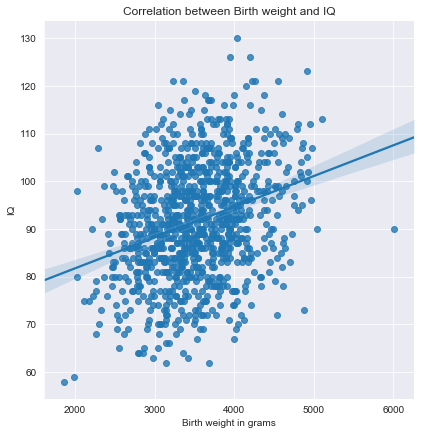

In [83]:
sns.lmplot(x="Birth weight in grams", y="IQ", data=dfcor, height = 6)
plt.title("Correlation between Birth weight and IQ");

In [84]:
sns.lmplot(x="IQ", y="Life expectancy in years", data = dfcor, height = 6)
plt.title("Correlation between IQ and Life Expectancy");

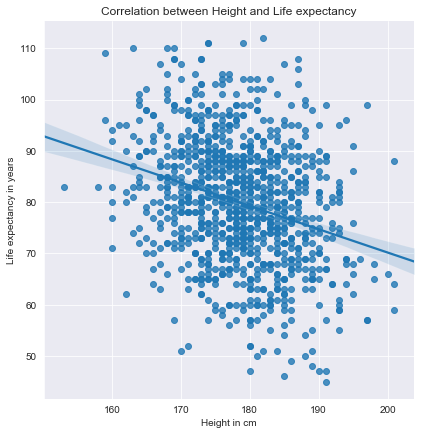

In [85]:
sns.lmplot(x="Height in cm", y="Life expectancy in years", data = dfcor, height = 6)
plt.title("Correlation between Height and Life expectancy");

Very clear to see the positive correlations between <em>birth weight</em> and <em>IQ</em>, and <em>IQ</em> and <em>life expectancy</em>. In the bottom plot, the negative correlation between <em>height</em> and <em>life expectancy</em> is easy to see. It seems we succeeded in simulating a correlated dataset. Let's make absolutely sure by plotting a pairplot of all possible correlations.

In [86]:
# Plot a pairplot of all possible correlations and fir linear regression models to the scatter plots.
sns.pairplot(dfcor, kind="reg");

Indeed, all correlations are consistent with the correlations I found and used to adjust my dataset. The most interesting correlation for me, as a tall guy, was the negative correlation between height and life expectancy. Time to get exercising and beat the odds!